In [1]:
import pgmpy as pg
from pgmpy.readwrite import BIFReader
import itertools
import networkx as nx

In [2]:
data = BIFReader("./data/burglar.bif")

In [3]:

# return all the set of vertices adjacent to a or b in graph G not including a and b. 
def get_AG(G, a, b):
    neighborsA = list(G.neighbors(a))     
    neighborsB = list(G.neighbors(b))
    unique = list(set(neighborsA + neighborsB))
    if a in unique:
        unique.remove(a)
    if b in unique:
        unique.remove(b)
    return unique

def I(G, a, S, b):
    tmpG = G.copy()
    for node in S:
        tmpG.remove_node(node)
    try:
        shortestPath = nx.shortest_path(tmpG, source=a, target=b)
        # print("Shortest Path between ", a, " and ", b, "-> ", shortestPath)
        return len(shortestPath) == 0
    except:
        return True

def get_degree(G):
    degree_all = G.degree
    max_degree = 0
    for node, degree in degree_all:
        max_degree = max(degree, max_degree)
    return max_degree

FINE -> GOTO P.10, with order:  4
FINE -> GOTO P.10, with order:  5
FINE -> GOTO P.10, with order:  6
FINE -> GOTO P.10, with order:  7
FINE -> GOTO P.10, with order:  8
FINE -> GOTO P.10, with order:  9
FINE -> GOTO P.10, with order:  10
FINE -> GOTO P.10, with order:  11
FINE -> GOTO P.10, with order:  12
FINE -> GOTO P.10, with order:  13
FINE -> GOTO P.10, with order:  14
FINE -> GOTO P.10, with order:  15
FINE -> GOTO P.10, with order:  16
FINE -> GOTO P.10, with order:  17
FINE -> GOTO P.10, with order:  18
FINE -> GOTO P.10, with order:  19
FINE -> GOTO P.10, with order:  20
FINE -> GOTO P.10, with order:  21
FINE -> GOTO P.10, with order:  22
FINE -> GOTO P.10, with order:  23
FINE -> GOTO P.10, with order:  24
FINE -> GOTO P.10, with order:  25
FINE -> GOTO P.10, with order:  26
FINE -> GOTO P.10, with order:  27
FINE -> GOTO P.10, with order:  28
FINE -> GOTO P.10, with order:  29
FINE -> GOTO P.10, with order:  30
FINE -> GOTO P.10, with order:  31
FINE -> GOTO P.10, with or

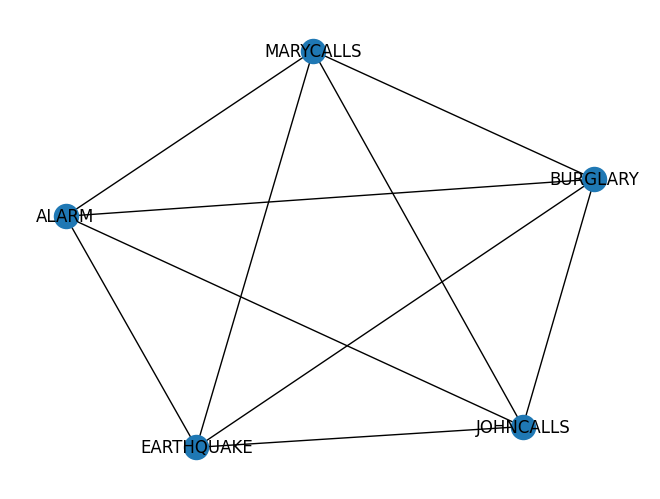

In [9]:
# Inizializing variables
# inital nodes
Z = data.get_values().keys()
# parents of node i-th
pi = data.get_parents()
# initial graph 
G1 = nx.Graph()
# adding nodes
G1.add_nodes_from(Z)
edges = itertools.combinations(Z, 2)
edges = list(edges)
G1.add_edges_from(edges)
# order is ord because ord is a keyword in python
order = 0
old_pi = {}
for node in Z:
    old_pi[node] = []
old_prob = 0
u = 3

# point 2
S = {}
k = 0
while(get_degree(G1) > u and k < 50):
    k = k + 1
    for (a,b) in G1.edges:
        # print("\n\nNodes: ", a, " and ", b)
        unique = get_AG(G1, a, b)    
        if len(unique) >= order:
            for subset in itertools.combinations(unique, order + 1 ):
                if I(G1, a, subset, b):
                    G1.remove_edge(a,b)
                    S[a+b] = subset
                    break
    forced_exit = True
    for (a,b) in G1.edges:
        if(len(get_AG(G1, a, b)) >= order):
            forced_exit = False
    if forced_exit:
        continue
        # print("FINE -> GOTO P.10, with order: ", order)
    order = order + 1
# print(G1)
print(S)
nx.draw(G1, with_labels=True)

{'BURGLARY': set(), 'EARTHQUAKE': set(), 'ALARM': set(), 'JOHNCALLS': set(), 'MARYCALLS': set()}


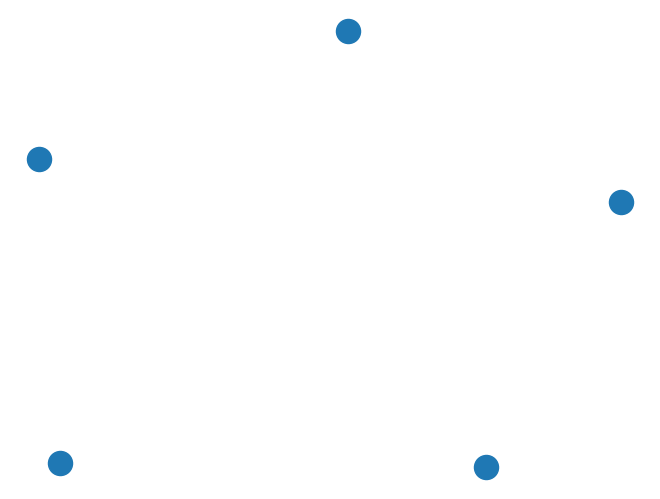

In [52]:
# point 3

# direct graph with no edges
G_directed = nx.DiGraph()
G_directed.add_nodes_from(Z)

# undirect graph copy of G1
G_undirected = G1.copy()

not_adjacents_all = {}
for node in Z:
    neighbors = list(G_undirected.neighbors(node))
    not_adjacents_all[node] = (Z - neighbors) - set([node])

print(not_adjacents_all)
for (a, not_adjacent_node) in not_adjacents_all.items():
    for b in not_adjacent_node:
        common = set(G_undirected.neighbors(a)).intersection(G_undirected.neighbors(b))
        # print(common)
        for c in common:
            # print(S[a+b])
            if c not in S[a + b]:
                G_directed.add_edge(a,c)
                G_directed.add_edge(b,c)
                if nx.cycles(G_directed):
                    G_directed.remove_edge(a,c)
                    G_directed.remove_edge(b,c)
                
# nx.draw_shell(directedG)
nx.draw(G_directed)


In [48]:
# point 4
def rule1():
    for a,b in G_directed.edges:
        for c in G_undirected.edgs(b):
               
     return 0

def rule2():
    return 0

def rule3():
    return 0

def rule4():
    return 0

[]
